In [40]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [41]:
head_list = ["nTracks","nShowers","nVertex","trkE","EmE","pidaLong","pidaShort","lenLong","lenShort","visE","pLong","trackEfrac","nFlashes","flashPE","sig"]
atmo = pd.read_csv("atmotree.csv",names=head_list,header=None,index_col=False)
pdk = pd.read_csv("pdktree.csv",names=head_list,header=None,index_col=False)

# Signal and background csvs are imported, as well as necessary libraries. Look to see they have expected behavior.

In [42]:
atmo.head()

,nTracks,nShowers,nVertex,trkE,EmE,pidaLong,pidaShort,lenLong,lenShort,visE,pLong,trackEfrac,nFlashes,flashPE,sig
0,4,3,8,0,0,2.80234,0.00000,32.28260,0.00000,0,0.181436,0.000000,2,4324.7500,0
1,2,0,3,0,0,7.25686,3.42414,22.88710,3.26208,0,0.155040,0.638613,2,65.1302,0
2,2,0,3,0,0,16.05470,24.33140,9.66974,2.66706,0,0.109716,0.365521,2,83.0714,0
3,2,0,3,0,0,9.95274,16.83320,27.91820,18.74930,0,0.169489,0.887705,2,78.9774,0
4,4,0,5,0,0,4.32084,3.04405,91.82640,5.22213,0,0.321967,0.000000,2,2062.8600,0


In [43]:
pdk.head()

,nTracks,nShowers,nVertex,trkE,EmE,pidaLong,pidaShort,lenLong,lenShort,visE,pLong,trackEfrac,nFlashes,flashPE,sig
0,2,0,3,0,0,6.58654,5.87317,48.6192,15.53310,0,0.222760,0.657262,2,1333.5800,1
1,2,0,3,0,0,8.64484,4.02827,51.2072,7.49073,0,0.228995,0.709013,2,564.0920,1
2,3,0,4,0,0,5.81910,39.44040,14.6574,3.74200,0,0.128947,0.298063,1,284.0100,1
3,2,0,3,0,0,10.86520,11.28500,34.3021,22.75140,0,0.186802,0.799846,3,92.4554,1
4,2,0,3,0,0,9.38759,9.70459,50.4080,12.87600,0,0.227076,0.868688,1,56.5050,1


In [44]:
pdk_df = atmo
pdk_df=pdk_df.append(pdk,ignore_index=True)
pdk_df=pdk_df.drop(["trkE","EmE","visE"],axis=1)

In [45]:
import seaborn as sb

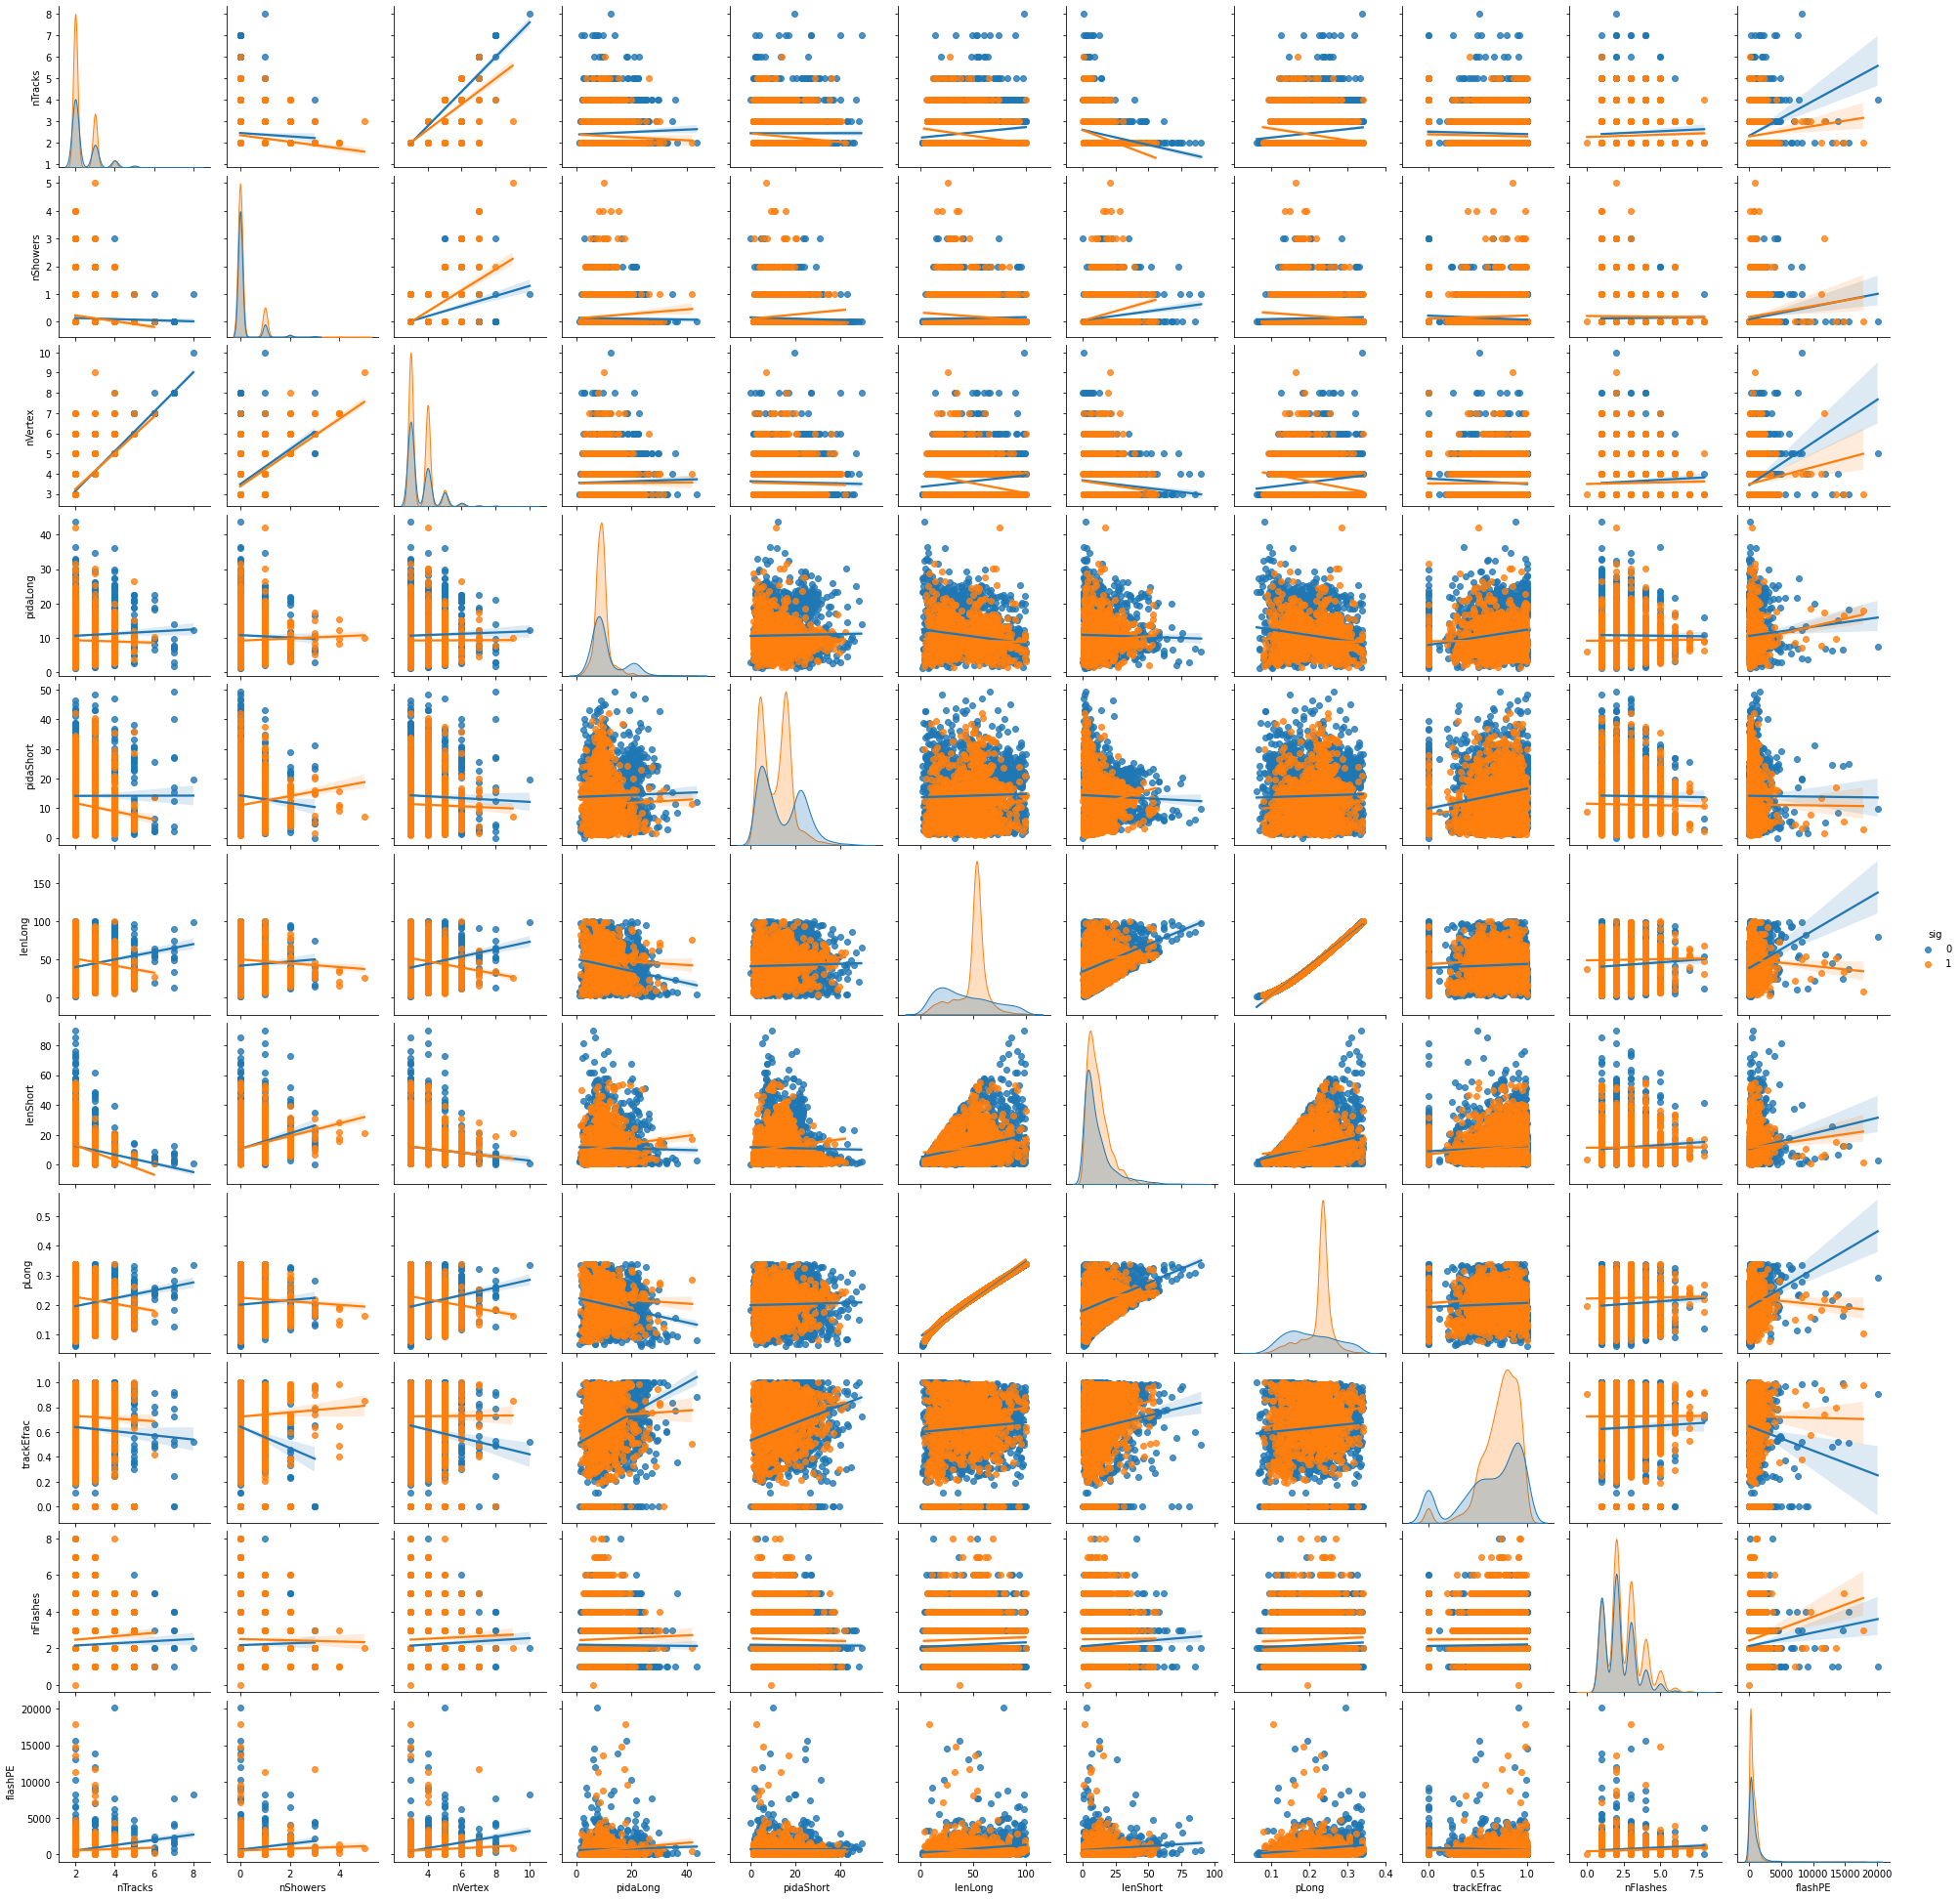

In [47]:
sb.pairplot(data=pdk_df,kind="reg",hue="sig")

In [48]:
pdk_target = pdk_df.sig

### Pull off the "signal" column to use as the target for our ML models

In [49]:
pdk_target
pdk_df=pdk_df.drop(["sig"],axis=1)

### Use 70% of the sample as a training set, and split here. Have a look to make sure it makes sense

In [50]:
X_train, X_test, y_train, y_test =train_test_split(pdk_df, pdk_target, test_size = 0.3)
X_train.head()

,nTracks,nShowers,nVertex,pidaLong,pidaShort,lenLong,lenShort,pLong,trackEfrac,nFlashes,flashPE
1553,3,0,4,9.43245,25.18360,59.3959,6.74429,0.248381,0.799430,1,1265.2600
4459,2,0,3,7.40875,13.77530,52.6134,13.04590,0.232359,0.924864,2,77.6014
1850,3,1,4,8.88818,26.09890,57.9384,15.06250,0.244965,0.526888,4,2339.0800
1202,2,0,3,7.72660,3.41873,25.9980,3.27449,0.164065,0.295817,4,731.6990
4401,3,0,4,6.89171,5.30686,55.2961,20.46720,0.238735,0.935779,4,537.4910


In [51]:
y_train.head()

1553    0
4459    1
1850    0
1202    0
4401    1
Name: sig, dtype: int64

In [52]:
from sklearn import tree
from sklearn import svm

## Here we make our ML models. First a decision tree, we do nothing special to it and let it find its own path

In [53]:
clf=tree.DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier()

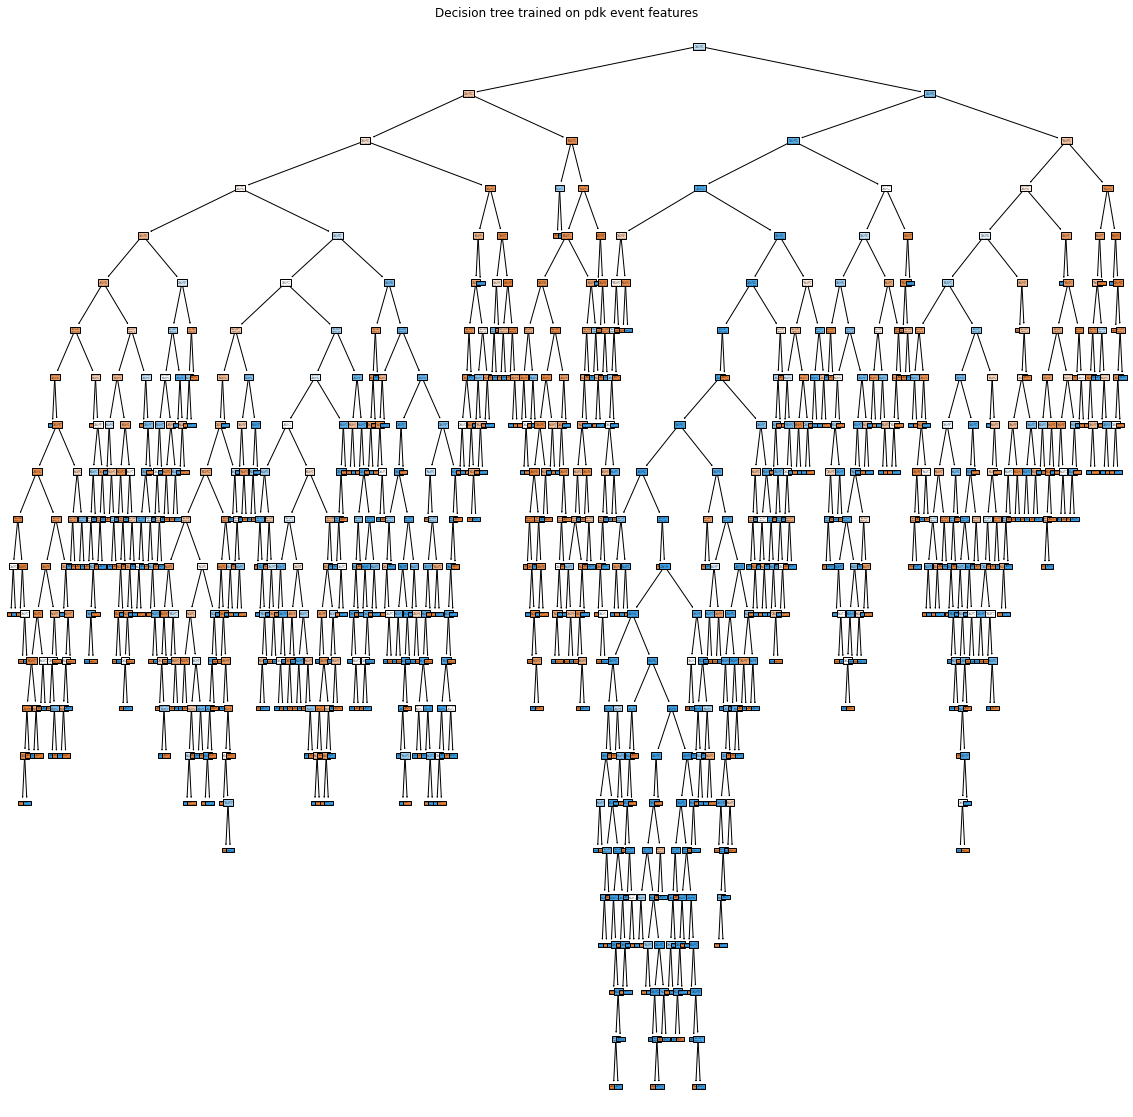

In [54]:
from sklearn.tree import plot_tree
plt.figure(figsize=[20,20])
plot_tree(clf, filled=True)
plt.title("Decision tree trained on pdk event features")
plt.show()

In [55]:
clf.predict(X_test)

array([1, 0, 1, ..., 0, 1, 0])

In [111]:
clf_score = clf.score(X_test,y_test)
print("The score of the Decision tree classifier is ", clf_score )

The score of the Decision tree classifier is  0.7805933250927071


In [57]:
for i in ["sig","trkE","EmE","visE"]:
    head_list.remove(i)

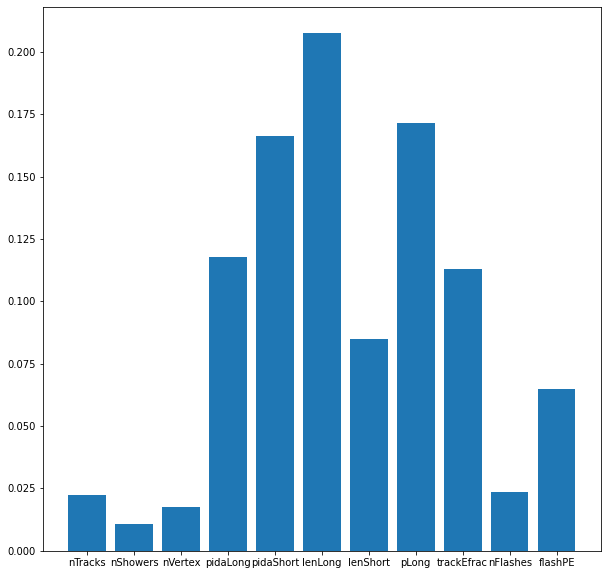

In [58]:
plt.figure(figsize=[10,10])
plt.bar(head_list,clf.feature_importances_)
plt.xlabel="Feature"
plt.ylabel="Importance"
plt.show()

## Here we try a Gradient Boosting Classifier

In [59]:
from sklearn import ensemble
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, RocCurveDisplay

In [60]:
gbc = ensemble.GradientBoostingClassifier()

In [61]:
gbc.fit(X_train,y_train)
gbc_preds=gbc.predict(X_test)

In [113]:
gbc_score= gbc.score(X_test,y_test)
print(gbc_score)

0.8238566131025958


It does pretty okay, but can we improve some

In [63]:
classification_report(y_test,gbc_preds)

'              precision    recall  f1-score   support\n\n           0       0.80      0.78      0.79       682\n           1       0.84      0.86      0.85       936\n\n    accuracy                           0.82      1618\n   macro avg       0.82      0.82      0.82      1618\nweighted avg       0.82      0.82      0.82      1618\n'

In [64]:
confusion_matrix(y_test,gbc_preds)

array([[530, 152],
       [133, 803]])

In [65]:
y_scores_gb = gbc.decision_function(X_test)
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_scores_gb)
roc_auc_gb = auc(fpr_gb, tpr_gb)

print("Area under ROC curve = {:0.2f}".format(roc_auc_gb))

Area under ROC curve = 0.91


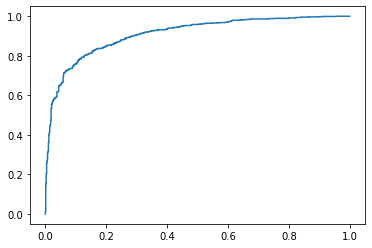

In [66]:
plt.figure()
plt.plot(fpr_gb,tpr_gb)

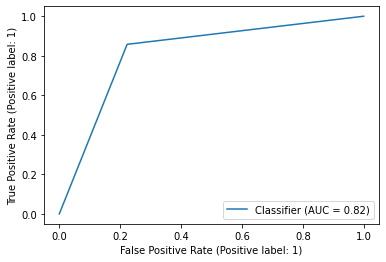

In [67]:
RocCurveDisplay.from_predictions(y_test,gbc_preds)

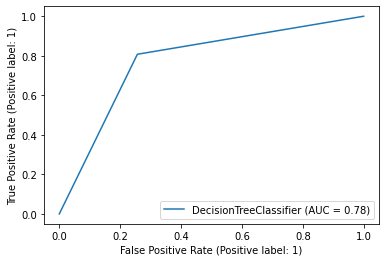

In [68]:
RocCurveDisplay.from_estimator(clf,X_test,y_test)

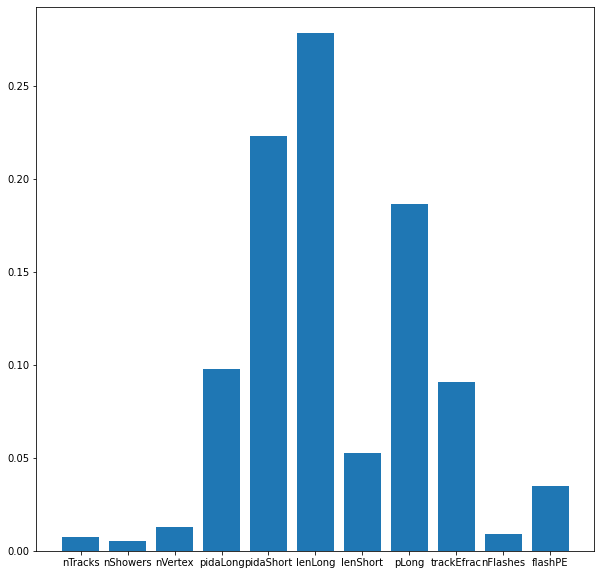

In [69]:
plt.figure(figsize=[10,10])
plt.bar(head_list,gbc.feature_importances_)
plt.xlabel="Feature"
plt.ylabel="Importance"
plt.show()

In [70]:
gbc500 = ensemble.GradientBoostingClassifier(n_estimators=500)
gbc500.fit(X_train,y_train)
gbc500.score(X_test,y_test)

0.8325092707045736

In [71]:
gbc5 = ensemble.GradientBoostingClassifier(learning_rate=.01,n_estimators=10000)
gbc5.fit(X_train,y_train)
gbc5.score(X_test,y_test)

0.8213844252163165

In [72]:
gbc.feature_importances_

array([0.00756682, 0.00546373, 0.01281553, 0.09782347, 0.22322257,
       0.27858331, 0.05239289, 0.18671398, 0.09110008, 0.00922381,
       0.03509382])

## What about an SVC? 

In [114]:
svc = svm.NuSVC(gamma="auto")
svc.fit(X_train,y_train)
svc_score=svc.score(X_test,y_test)
print (svc_score)

0.5871446229913473


In [115]:
from sklearn.neural_network import MLPClassifier
nnCLF = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(10,10, 5,3,2), random_state=3)
nnCLF.fit(X_train,y_train)
nnCLF_score=nnCLF.score(X_test,y_test)

# OKAY, let us do the same thing but for the flash matched set

In [75]:
head_list = ["nTracks","nShowers","nVertex","trkE","EmE","pidaLong","pidaShort","lenLong","lenShort","visE","pLong","trackEfrac","nFlashes","flashPE","sig"]
atmo_flash = pd.read_csv("atmotree_flash.csv",names=head_list,header=None,index_col=False)
pdk_flash = pd.read_csv("pdktree_flash.csv",names=head_list,header=None,index_col=False)

# Signal and background csvs are imported, as well as necessary libraries. Look to see they have expected behavior.

In [76]:
atmo_flash.head()

,nTracks,nShowers,nVertex,trkE,EmE,pidaLong,pidaShort,lenLong,lenShort,visE,pLong,trackEfrac,nFlashes,flashPE,sig
0,4,3,8,0,0,2.80235,0.00000,32.28260,0.00000,0,0.181436,0.000000,2,4324.7500,0
1,2,0,3,0,0,7.25687,3.42417,22.88720,3.26216,0,0.155040,0.638613,2,65.1302,0
2,2,0,3,0,0,16.05480,24.33480,9.66977,2.66716,0,0.109716,0.365521,2,83.0714,0
3,2,0,3,0,0,9.95286,16.83320,27.91830,18.74940,0,0.169489,0.887705,2,78.9774,0
4,4,0,5,0,0,4.32089,3.04405,91.82640,5.22212,0,0.321967,0.000000,2,2062.8600,0


In [77]:
pdk_flash.head()

,nTracks,nShowers,nVertex,trkE,EmE,pidaLong,pidaShort,lenLong,lenShort,visE,pLong,trackEfrac,nFlashes,flashPE,sig
0,2,0,3,0,0,6.58657,5.87317,48.6192,15.53310,0,0.222760,0.657262,2,1333.5800,1
1,2,0,3,0,0,8.64485,4.02850,51.2072,7.49075,0,0.228995,0.709013,2,564.0920,1
2,3,0,4,0,0,5.81910,39.44160,14.6574,3.74199,0,0.128947,0.298063,1,284.0100,1
3,2,0,3,0,0,10.86530,11.28540,34.3021,22.75130,0,0.186802,0.799846,3,92.4554,1
4,2,0,3,0,0,9.38758,9.70308,50.4079,12.87360,0,0.227075,0.868688,1,56.5050,1


In [78]:
pdk_fdf = atmo_flash
pdk_fdf=pdk_fdf.append(pdk_flash,ignore_index=True)
pdk_fdf=pdk_fdf.drop(["trkE","EmE","visE"],axis=1)

In [79]:
import seaborn as sb

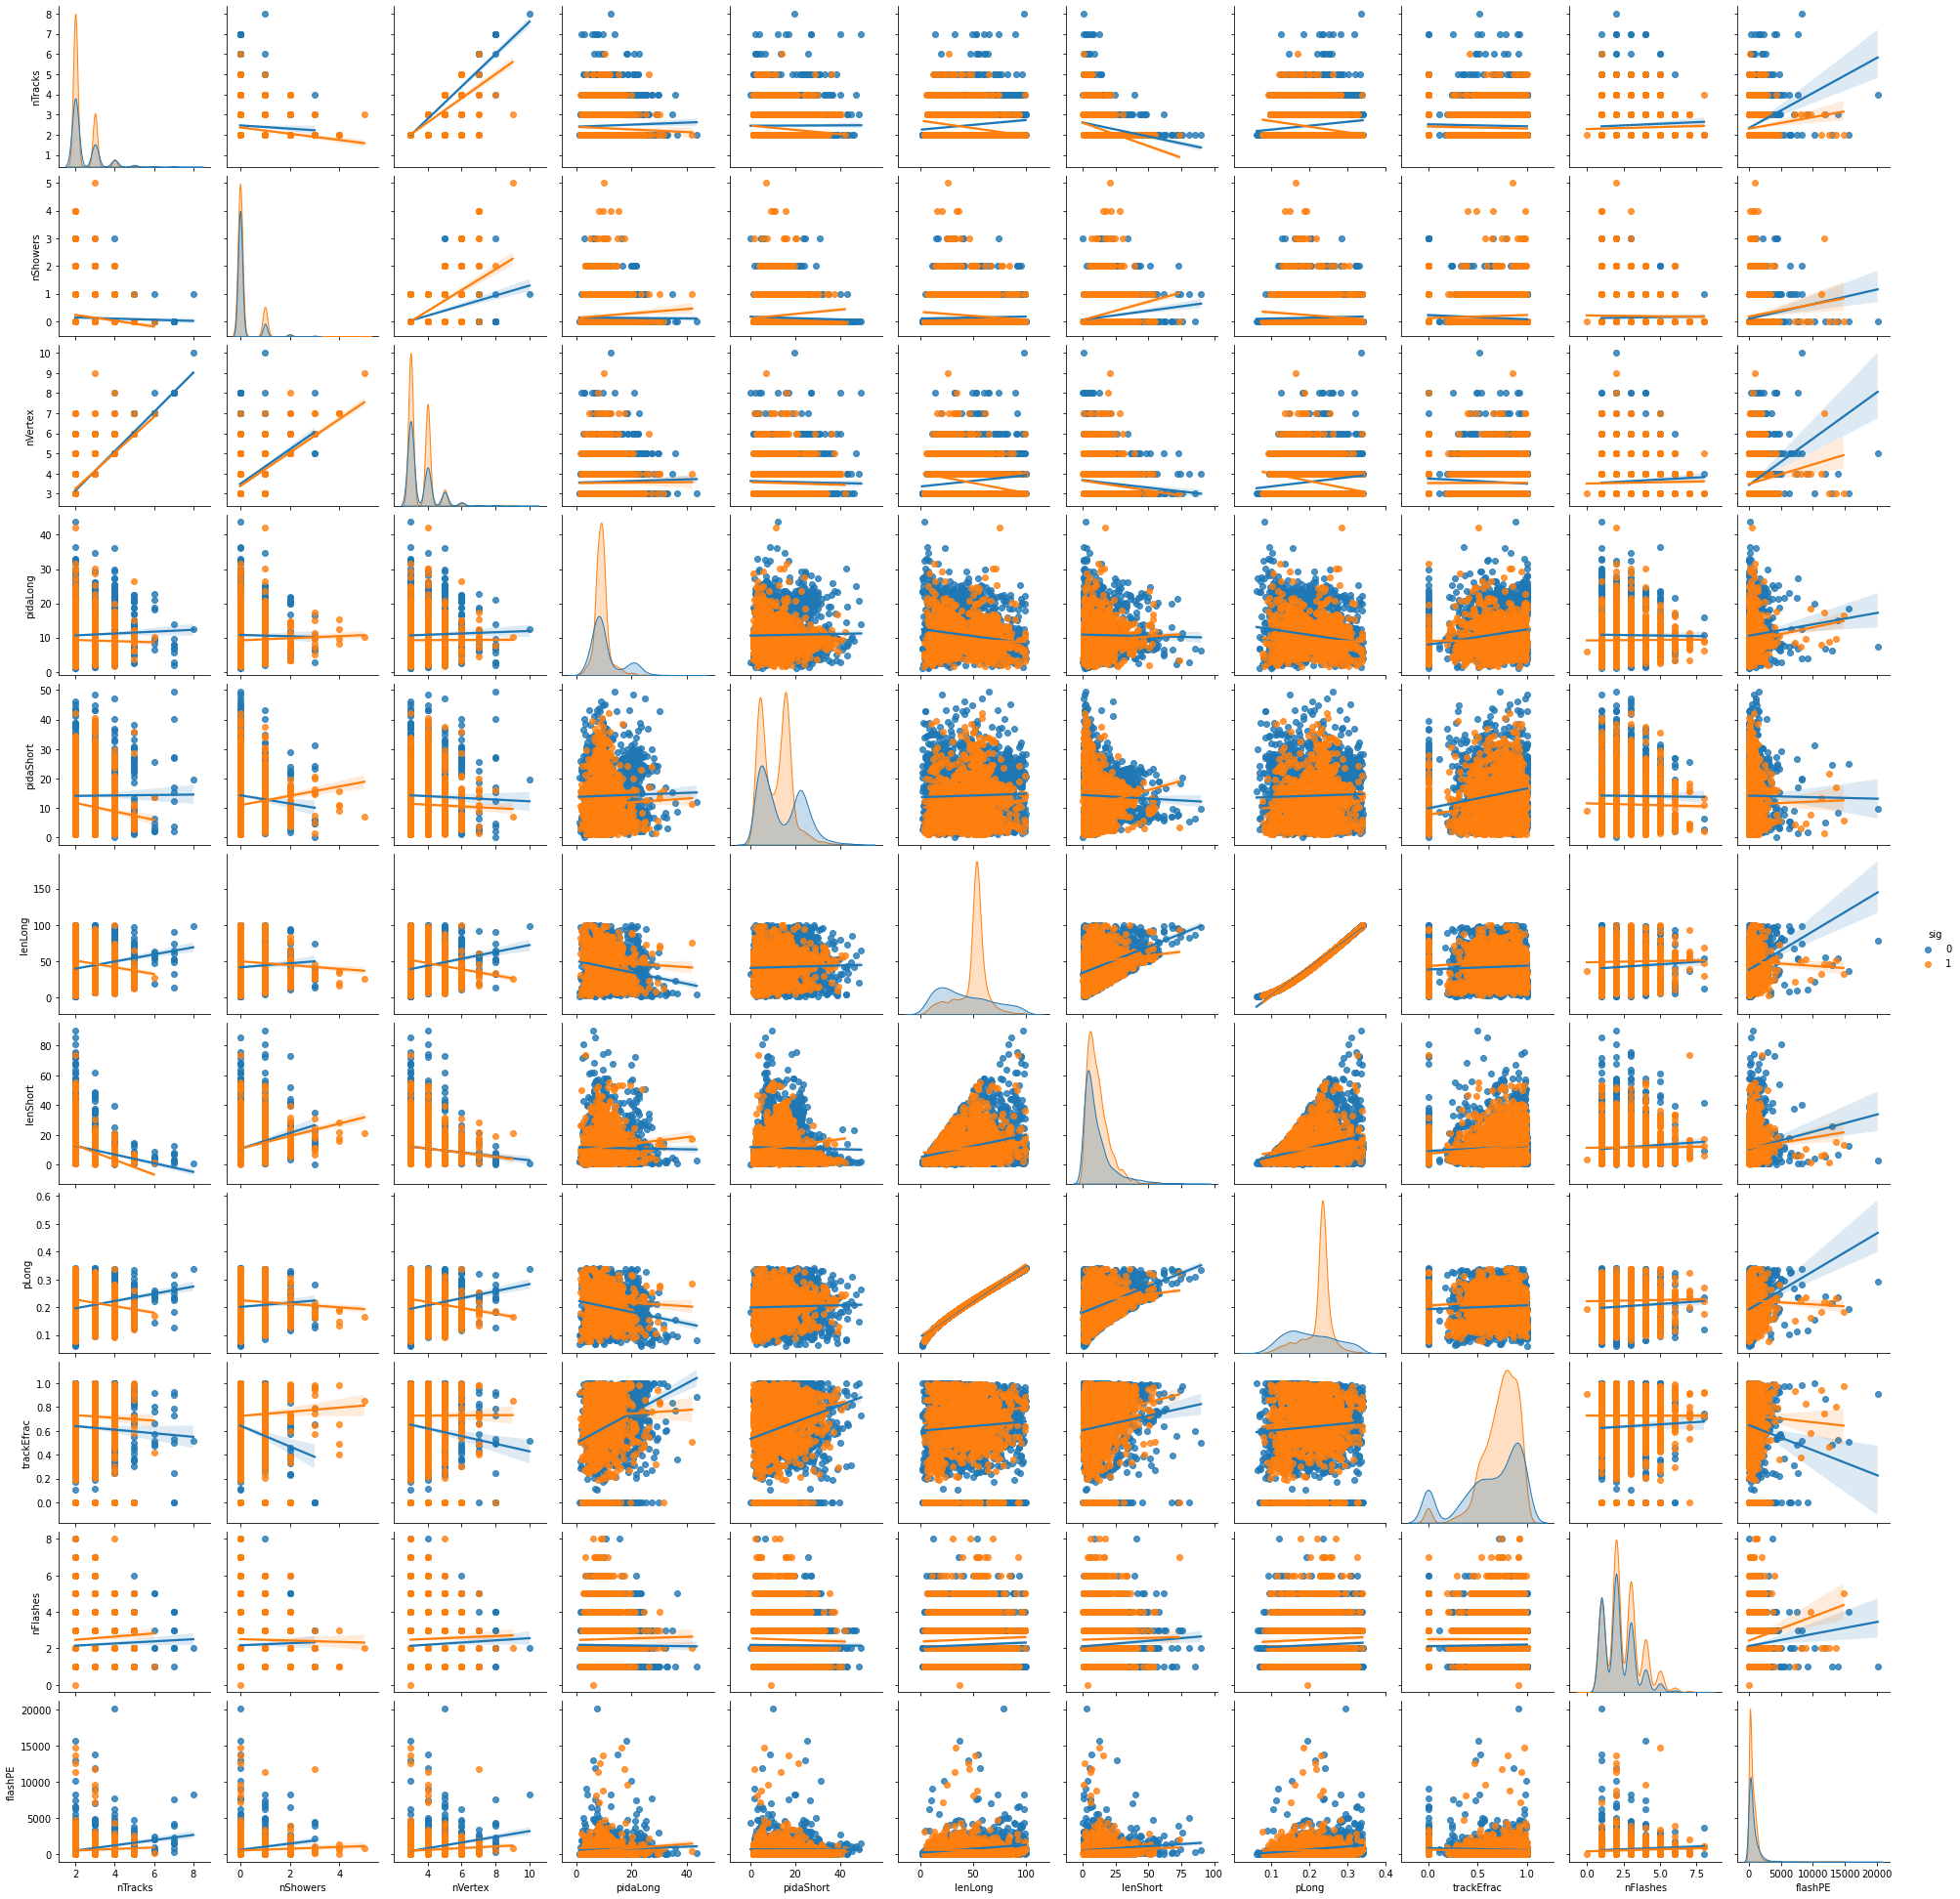

In [80]:
sb.pairplot(data=pdk_fdf,kind="reg",hue="sig")

In [81]:
pdk_ftarget = pdk_fdf.sig

# Pull off the "signal" column to use as the target for our ML models

In [83]:
pdk_ftarget
pdk_fdf=pdk_fdf.drop(["sig"],axis=1)

# Use 70% of the sample as a training set, and split here. Have a look to make sure it makes sense

In [84]:
Xf_train, Xf_test, yf_train, yf_test =train_test_split(pdk_fdf, pdk_ftarget, test_size = 0.3)
Xf_train.head()

,nTracks,nShowers,nVertex,pidaLong,pidaShort,lenLong,lenShort,pLong,trackEfrac,nFlashes,flashPE
4181,4,0,5,3.57862,29.56420,14.3163,1.60480,0.127744,0.784460,1,47.8105
4862,2,0,3,9.64685,11.49220,28.7892,24.62590,0.171914,0.724953,2,1118.2600
2409,2,0,3,11.88290,12.43680,18.1767,15.65770,0.140674,0.485289,1,60.1437
2430,2,0,3,9.36538,5.30291,52.2095,10.39500,0.231395,0.661701,2,879.2160
1828,2,0,3,17.88810,8.47248,7.7891,3.15409,0.101277,0.960198,2,16.7124


In [85]:
yf_train.head()

4181    1
4862    1
2409    1
2430    1
1828    0
Name: sig, dtype: int64

In [86]:
from sklearn import tree
from sklearn import svm

# Here we make our ML models. First a decision tree, we do nothing special to it and let it find its own path

In [87]:
Fclf=tree.DecisionTreeClassifier()
Fclf.fit(Xf_train,yf_train)

DecisionTreeClassifier()

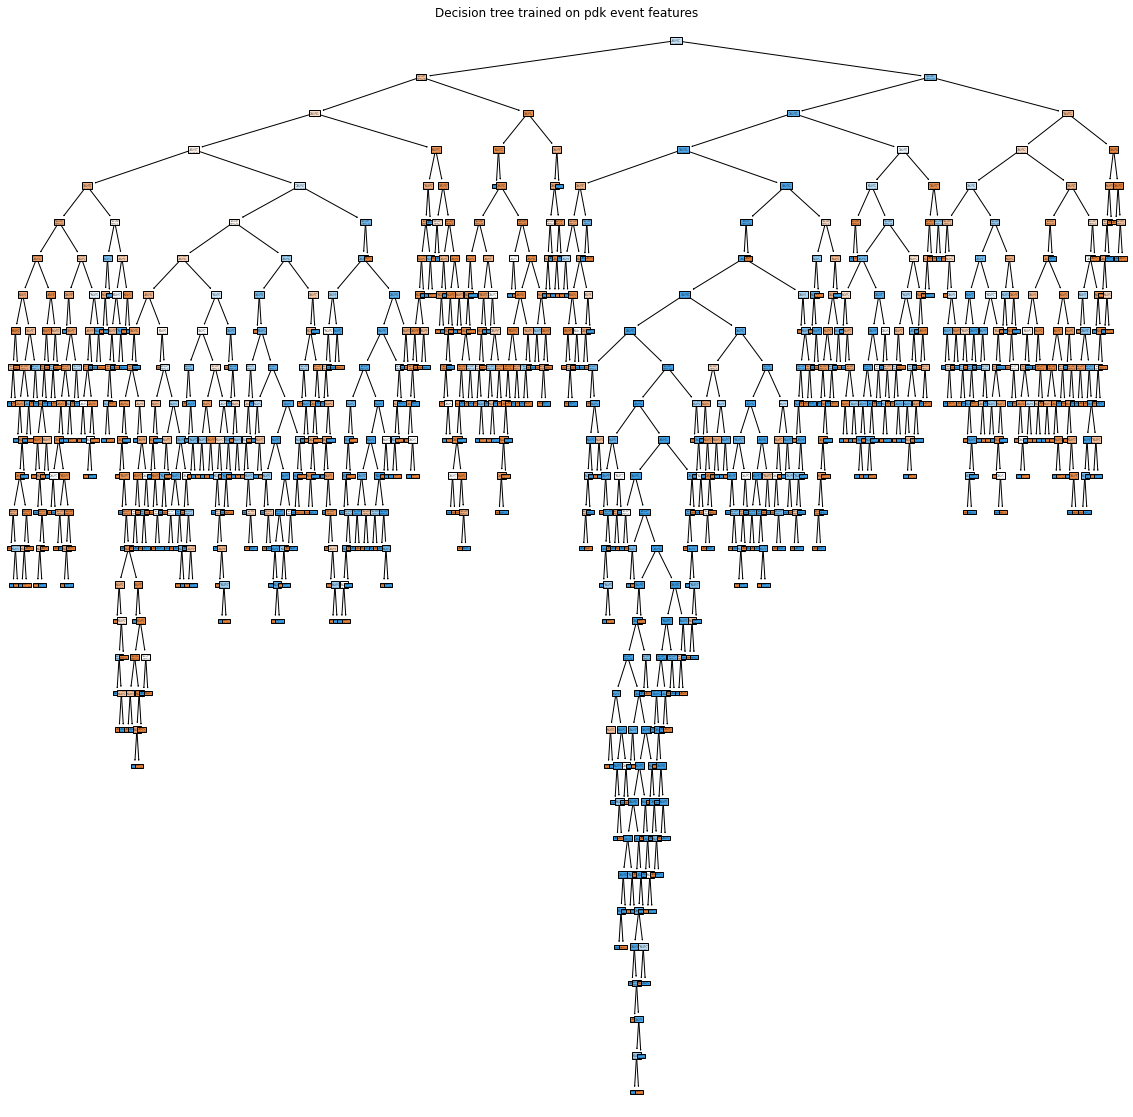

In [88]:
from sklearn.tree import plot_tree
plt.figure(figsize=[20,20])
plot_tree(Fclf, filled=True)
plt.title("Decision tree trained on pdk event features")
plt.show()

In [89]:
Fclf.predict(X_test)

array([1, 1, 1, ..., 0, 1, 0])

In [116]:
Fclf_score= Fclf.score(X_test,y_test)
print("The score of the Decision tree classifier is ", Fclf_score)

The score of the Decision tree classifier is  0.9276885043263288


In [91]:
for i in ["sig","trkE","EmE","visE"]:
    head_list.remove(i)

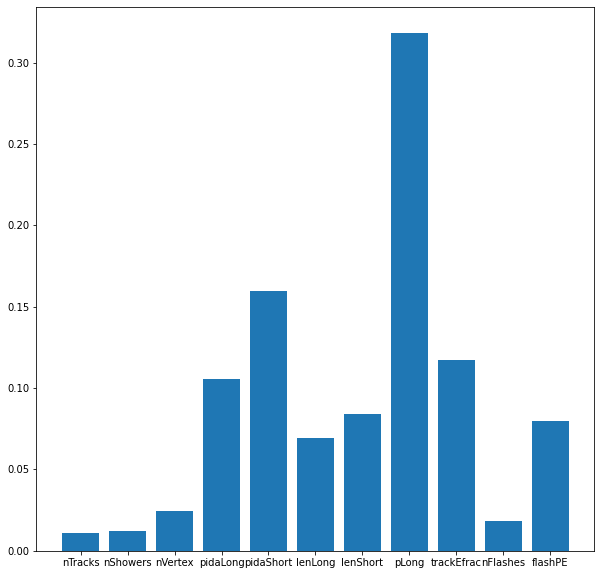

In [92]:
plt.figure(figsize=[10,10])
plt.bar(head_list,Fclf.feature_importances_)
plt.xlabel="Feature"
plt.ylabel="Importance"
plt.show()

# Here we try a Gradient Boosting Classifier

In [93]:
from sklearn import ensemble
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, RocCurveDisplay

In [94]:
Fgbc = ensemble.GradientBoostingClassifier()

In [95]:
Fgbc.fit(Xf_train,yf_train)
Fgbc_preds=gbc.predict(Xf_test)

In [117]:
Fgbc_score = Fgbc.score(Xf_test,yf_test)
print(Fgbc_score)

0.8296296296296296


It does pretty okay, but can we improve some

In [97]:
classification_report(yf_test,Fgbc_preds)

'              precision    recall  f1-score   support\n\n           0       0.84      0.80      0.82       666\n           1       0.87      0.89      0.88       954\n\n    accuracy                           0.86      1620\n   macro avg       0.85      0.85      0.85      1620\nweighted avg       0.86      0.86      0.86      1620\n'

In [98]:
confusion_matrix(yf_test,Fgbc_preds)

array([[536, 130],
       [104, 850]])

In [99]:
yf_scores_gb = Fgbc.decision_function(Xf_test)
ffpr_gb, ftpr_gb, _ = roc_curve(yf_test, yf_scores_gb)
froc_auc_gb = auc(ffpr_gb, ftpr_gb)

print("Area under ROC curve = {:0.2f}".format(froc_auc_gb))

Area under ROC curve = 0.91


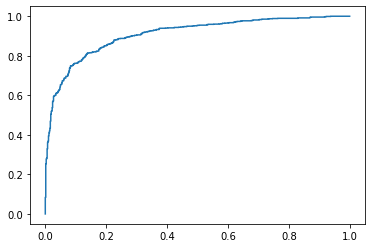

In [100]:
plt.figure()
plt.plot(ffpr_gb,ftpr_gb)

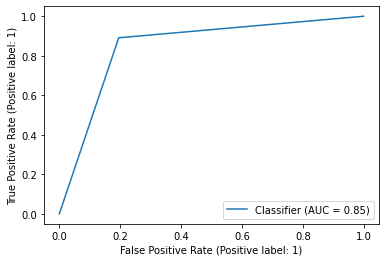

In [101]:
RocCurveDisplay.from_predictions(yf_test,Fgbc_preds)

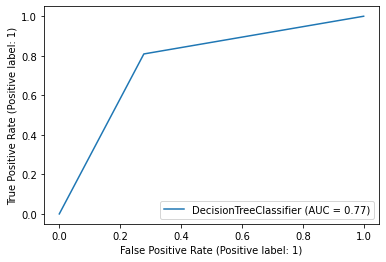

In [102]:
RocCurveDisplay.from_estimator(Fclf,Xf_test,yf_test)

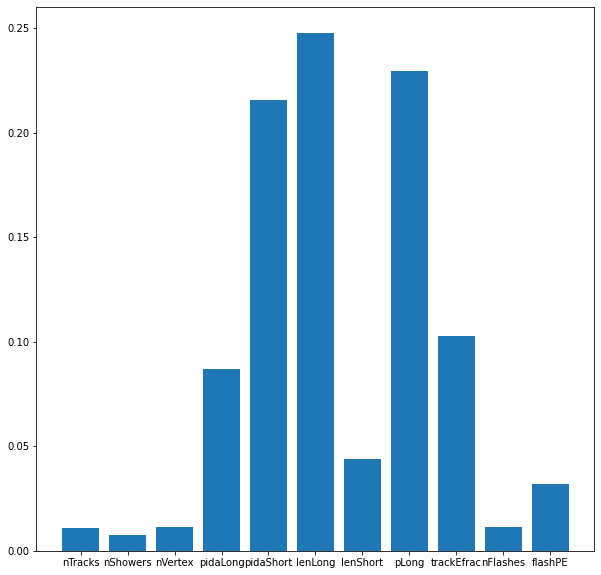

In [103]:
plt.figure(figsize=[10,10])
plt.bar(head_list,Fgbc.feature_importances_)
plt.xlabel="Feature"
plt.ylabel="Importance"
plt.show()

In [104]:
Fgbc500 = ensemble.GradientBoostingClassifier(n_estimators=500)
Fgbc500.fit(Xf_train,yf_train)
Fgbc500.score(Xf_test,yf_test)

0.8345679012345679

In [105]:
Fgbc5 = ensemble.GradientBoostingClassifier(learning_rate=.01,n_estimators=10000)
Fgbc5.fit(Xf_train,yf_train)
Fgbc5.score(Xf_test,yf_test)

0.8333333333333334

In [106]:
Fgbc.feature_importances_

array([0.01076333, 0.00768859, 0.01139055, 0.08712421, 0.21575624,
       0.24768661, 0.04379448, 0.22974029, 0.10267851, 0.01134448,
       0.03203272])

# What about an SVC? 

In [118]:
Fsvc = svm.NuSVC(gamma="auto")
Fsvc.fit(Xf_train,yf_train)
Fsvc_score = Fsvc.score(Xf_test,yf_test)

In [119]:
from sklearn.neural_network import MLPClassifier
FnnCLF = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(10,10, 5,3,2), random_state=3)
FnnCLF.fit(Xf_train,yf_train)
FnnCLF_score = FnnCLF.score(Xf_test,yf_test)

/Users/kylespurgeon/Library/Python/3.7/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


# How do the scores match up?

In [141]:
scores_df_dict = {"Classifier":["DecTree","GBC","SVC","NN"],
                  "Prod":[clf_score,gbc_score,svc_score,nnCLF_score],
                  "Flash Matched":[Fclf_score,Fgbc_score,Fsvc_score,FnnCLF_score]}
scores_df=pd.DataFrame(scores_df_dict)
scores_df=scores_df.set_index("Classifier")

<AxesSubplot:xlabel='Classifier', ylabel='Score'>

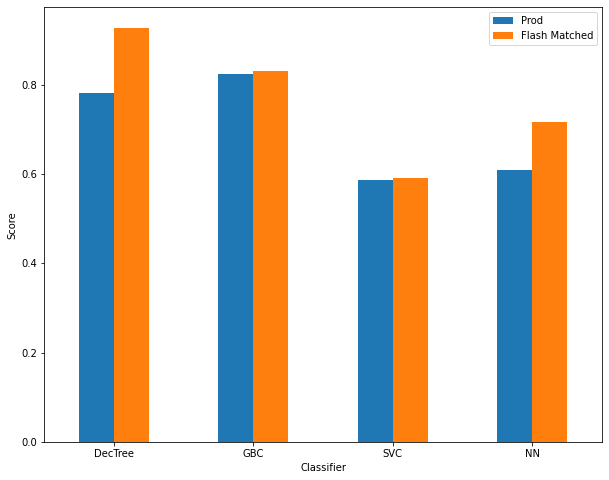

In [159]:
scores_df.plot(kind="bar",figsize=[10,8],ylabel="Score",rot=0)